DATA
SOURCE: 

DESCRIPTION
Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance.
SUMMARY
In the dataset,

X = number of claims

Y = total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden

Reference:

Swedish Committee on Analysis of Risk Premium in Motor Insurance

https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/slr06.html



In [ ]:
import tensorflow as tf

In [ ]:
# kaggle datasets on link
# https://www.kaggle.com/sunmarkil/auto-insurance-in-sweden

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/datasets/datasets_6144_9041_insurance.csv", )

In [ ]:
df_1 = df.iloc[7:, :]
df_1= df_1["Auto Insurance in Sweden"].str.split("\t",expand = True) 
df_1 = df_1.reset_index().drop(columns = ['index'])
df_1.columns = df_1.iloc[0, :]
df_1 = df_1.drop([0])

In [ ]:
df_1.head()

,X,Y
1,108,392.5
2,19,46.2
3,13,15.7
4,124,422.2
5,40,119.4


In [ ]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [ ]:
# Converting data data to array
import numpy as np
rng = np.random

X = np.array(df_1['X'])
Y = np.array(df_1['Y'])

In [ ]:
# Weight and bias initialized randomly,
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Define Linear Regression (Wx + b)
def linear_regression(x):
  return (W * x + b)

def mean_square(y_pred, y_true):
  return (tf.reduce_mean(tf.square(y_pred - y_true)))

# Stochastic Gradient Desent Optimizer.
# optimizer = tf.optimizers.Adam(learning_rate, beta_1=0.5, beta_2=0.888, epsilon=1e-07, amsgrad=False,
#    name='Adam')

#optimizer = tf.optimizers.Adagrad(learning_rate, epsilon=1e-06)
optimizer = tf.optimizers.Adamax(learning_rate, beta_1=0.5, beta_2=0.666, epsilon=1e-06)

In [ ]:
def run_optimization():

  # Wrap computation inside a GraditTape for automatic differentiation
  with tf.GradientTape() as tape:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)

    # Compute gradient,
    gradients = tape.gradient(loss, [W, b])

    # Update W and b following gradient,
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [ ]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
  # Run the optimization to update W and b
  run_optimization()

  if step % display_step == 0:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
    print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 16641.451172, W: 0.056206, b: 0.252903
step: 100, loss: 12795.944336, W: 0.557658, b: 0.754226
step: 150, loss: 9506.222656, W: 1.059359, b: 1.255751
step: 200, loss: 6772.605957, W: 1.561412, b: 1.757553
step: 250, loss: 4595.570801, W: 2.064001, b: 2.259754
step: 300, loss: 2975.890869, W: 2.567510, b: 2.762588
step: 350, loss: 1915.029175, W: 3.072992, b: 3.266576
step: 400, loss: 1417.197632, W: 3.586497, b: 3.773447
step: 450, loss: 1375.639648, W: 3.752771, b: 4.278399
step: 500, loss: 1367.815918, W: 3.740770, b: 4.778726
step: 550, loss: 1360.246338, W: 3.729171, b: 5.279077
step: 600, loss: 1352.925293, W: 3.722571, b: 5.779414
step: 650, loss: 1345.861572, W: 3.707119, b: 6.279816
step: 700, loss: 1339.044800, W: 3.696989, b: 6.780187
step: 750, loss: 1332.486450, W: 3.685650, b: 7.280605
step: 800, loss: 1326.176270, W: 3.679366, b: 7.780984
step: 850, loss: 1320.119873, W: 3.665098, b: 8.281427
step: 900, loss: 1314.315552, W: 3.655150, b: 8.781927
step: 950

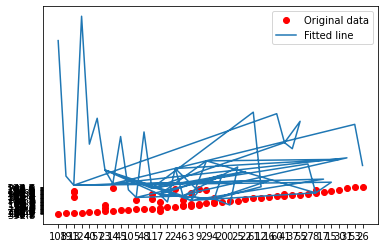

In [ ]:
import matplotlib.pyplot as plt

# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

In [ ]:
W

<tf.Variable 'weight:0' shape=() dtype=float32, numpy=3.4204686>